<table>
<thead>
  <tr>
    <td></td>
    <td>
        Kinga Węzka <br>
        kinga.wezka@pw.edu.pl <br>
        Warsaw University of Technology  <br>
Faculty Geodesy and Cartography <br>
<a ref="https://www.google.com/maps/place/Gmach+G%C5%82%C3%B3wny+Politechniki+Warszawskiej/@52.220656,21.0094422,19z/data=!3m1!4b1!4m5!3m4!1s0x471ecce951c85a19:0x712b0e1503c42b91!8m2!3d52.220656!4d21.0099894"> N 52&ordm; 12' 45&quot; / E 21&ordm; 03' 51&quot;</a>
    </td>
    <td>
<a rel="license" href="https://www.pw.edu.pl"><img alt="Politechnika Warszawska" style="border-width:0" src="https://www.pw.edu.pl/design/pw/images/znak-pw.png" width="50%" /></a>
    </td>
  </tr>
</thead>
</table>

<div class="alert alert-block alert-success">
<b> Temat: </b> 
    Znajdowanie współrzędnych punktów płaskich wewnątrz figury geometrycznej (kwadrat)
</div>

**Zadanie na kolokwium z Informatyki GIK PW sem. 4 (2021/2022) - punktacja:**


 | Zadanie | Zad. 01 | Zad. 02 | Zad. 03 | Zad. 04 | Suma|
 |---------|:-------:|:-------:|:-------:|:-------:|----:|
 | Punkty  |    2    |    4    |   4     |   4     |  14 |

### Dla  danych współrzędnych punktów płaskich x i y, wykonaj następujące działania:
+ **Zad.01** Połącz listy danych punktów x,y w tablicę (ndarray) o nazwie **dane**, zawierającą tyle wierszy ile  jest punktów w listach x,y oraz 3 kolumny, gdzie:
    + kolumna 1 to numer punktu (1,2,3,...200) - wygeneruj samodzielnie tę numeracje
    + kolumna 2 zawiera współrzędne x
    + kolumna 3 zawiera współrzedne y
 
 
+ **Zad.02** Wyznacz współrzędne x, y, będące średnią arytmetyczną danych współrzędnych x, y. Zbuduj okrąg o środku w tym punkcie i o promieniu 5. (w Zad.04 narysuj ten okrąg, wraz ze środkiem, oraz przypisz mu etykietę label = 'okrąg')


+ **Zad.03** Znajdź punkty, które znajdują się wewnątrz okręgu. Wybierz te punkty i stwórz nową tablicę, gdzie w kolejnych kolumnach będą numer, x oraz y tych punktów. W osobnej tablicy zapisz pozostałe punkty. 
+ **Zad.03b** Znajdź punkt, znajdujący się najbliżej oraz punkt, znajdujący się najdalej od środka okręgu. Wyświetl (print) ich numer oraz współrzędne.

**W zadaniach Zad.02 i 03 skorzystaj z poniższych podpowiedzi:**
1. parametryzacja okręgu:

$x = r \cdot \cos \alpha   \qquad \qquad \qquad y = r \cdot \sin \alpha \qquad $ gdzie $ \qquad\alpha \in <0, 2\pi) \quad$ a $\quad r \quad$ to promień okręgu

2. Wybierając punkty wewnątrz okręgu, warto obliczyć odległości kolejnych punktów, od środka okręgu

+ **Zad.04** Przygotuj wykres zawierający:
    + **dane**
    + okrąg, wraz z jego środkiem
    + pokoloruj punkty wewnątrz i na zewnątrz okręgu
    + przypisz etykiety kolejnym seriom danym (np. label = 'punkty wewnątrz okręgu') i wyświetl legendę
    
    Zadbaj o aspekty wizualne i czytelność swojego wykresu

In [109]:
import numpy as np
from numpy.linalg import inv
from math import pi, sin, cos, sqrt, exp
from pylab import randn
import matplotlib.pyplot as plt
plt.rcdefaults()
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.linestyle'] = '-'
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['axes.titlesize'] = 11
mpl.rcParams['axes.labelsize'] = 11
mpl.rcParams['axes.grid'] = True
mpl.rcParams['lines.markersize'] ** 2. # marker size in scatter

# Dane punkty x,y
n = 200
x = 4 * randn(n) + 15
y = 2 * randn(n) + 10

**Zad.01**

In [110]:
# Zad1. Złożenie tablicy
nr = np.arange(1, n+1)
data =  np.column_stack((nr.T, np.array(x).T, np.array(y).T)) 
print('wymiary tablicy (w, k):', np.shape(data))
print('tablica :\n', data)

wymiary tablicy (w, k): (200, 3)
tablica :
 [[  1.          17.16968295  11.7906189 ]
 [  2.          16.47793207  10.49725499]
 [  3.          11.25536995   6.13020826]
 [  4.           9.41585313   9.46629758]
 [  5.          18.92950252   7.70031228]
 [  6.          11.46865881  11.14057597]
 [  7.          10.05354287   7.79622042]
 [  8.          11.97360801   9.35674651]
 [  9.          15.90777351   9.02503025]
 [ 10.          19.7741966   10.37026565]
 [ 11.          14.82584629  11.32929715]
 [ 12.          18.75166686  14.43513025]
 [ 13.          10.63884609   9.04585581]
 [ 14.          21.29959669   9.64815282]
 [ 15.          24.22604595  12.10258696]
 [ 16.          14.90723734  11.61318189]
 [ 17.          16.75180144   9.85365664]
 [ 18.          14.10049273   9.49909876]
 [ 19.          16.41556427  10.67752833]
 [ 20.          13.6741222   11.03611226]
 [ 21.          11.21509786  14.52820956]
 [ 22.          12.12109277   9.4540968 ]
 [ 23.          10.27832     10.

**Zad.02**

In [111]:
# Zad2.
# Policzenie średnich wartości x, y, będących środkiem okręgu:
x0 = np.mean(x)
y0 = np.mean(y)
print(f'Środek okręgu ma współrzędne: x = {x0:.3f} i y = {y0:.3f}')
# współrzędne okregu
r = 5 # promień
alfa = np.linspace(0, 2*pi, 360) # 360 wartości kąta  alfa 
x_circle = x0 + r*np.cos(alfa)
y_circle = y0 + r*np.sin(alfa)
print(x_circle[0], y_circle[0])

Środek okręgu ma współrzędne: x = 14.717 i y = 10.044
19.717060702597582 10.044052566600532


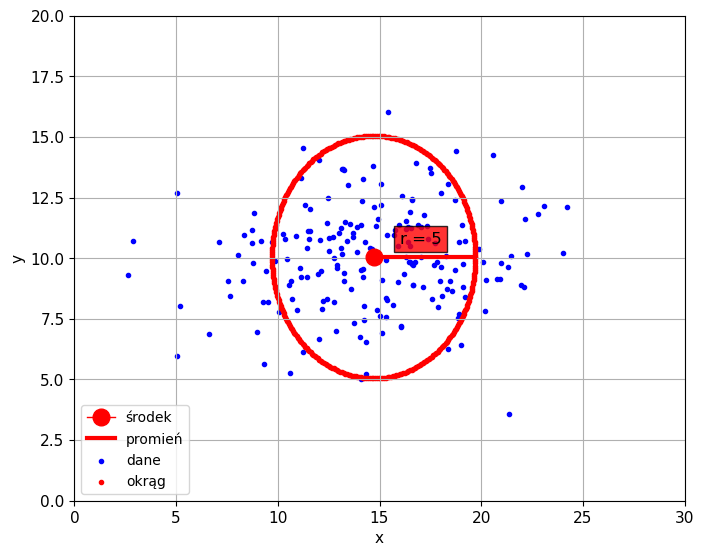

In [119]:
# Pomocniczo: narysowanie kwadratu z wyznaczonych współrzednych
xx = 20/2.54; yy = 16/2.54
fig, ax =  plt.subplots(nrows=1, ncols=1, figsize=(xx, yy))

ax.set_xlabel(r'x')
ax.set_ylabel(r'y')

ax.scatter(data[:,1], data[:,2], marker = '.', color = 'blue', label ='dane') 

ax.plot(x0, y0, marker = 'o', markersize =12, color = 'red', label ='środek') 
ax.plot( [x0, x_circle[0]], [y0, y_circle[0]], linewidth = 3, color = 'red', label ='promień')
ax.scatter(x_circle, y_circle, marker = '.', color = 'red', label ='okrąg')
plt.text(16,10.6,  f'r = {r}', fontsize=12, bbox=dict(facecolor='red', alpha=0.8))

ax.set_xlim(0, 30)
ax.set_ylim(0, 20)
ax.legend(loc='lower left')
plt.show()

**Zad.03**

In [113]:
# Współrzedne wewnątrz okręgu to współrzedne których odległość od jego środka jest mniejsza od długości promienia
rows_inside = []
rows_outside = []
for rows in data:
    if sqrt((rows[1] - x0)**2 + (rows[2] - y0)**2) <= r:
        rows_inside.append(rows)
    else:
        rows_outside.append(rows)

inside= np.array(rows_inside)
outside = np.array(rows_outside)

**Zad.04**

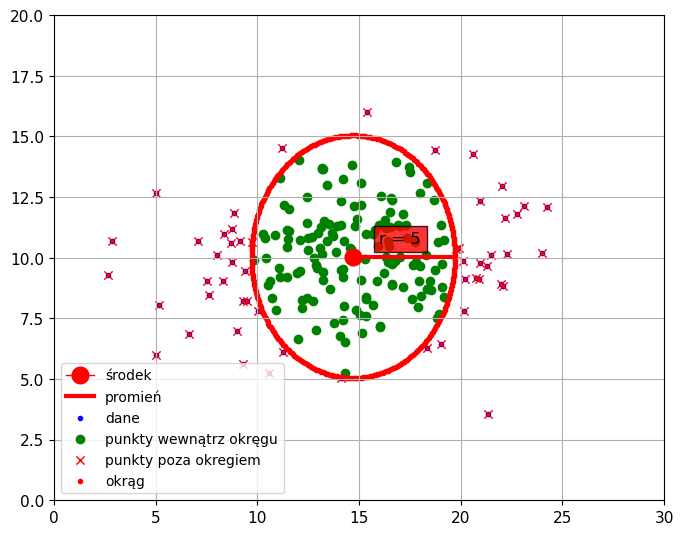

In [118]:
# Pomocniczo: narysowanie kwadratu z wyznaczonych współrzednych
xx = 20/2.54; yy = 16/2.54
fig, ax =  plt.subplots(nrows=1, ncols=1, figsize=(xx, yy))

ax.scatter(data[:,1], data[:,2], marker = '.', color = 'blue', label ='dane') 
ax.scatter(inside[:,1], inside[:,2], marker = 'o', color = 'green', label ='punkty wewnątrz okręgu') 
ax.scatter(outside[:,1], outside[:,2], marker = 'x', color = 'red', label ='punkty poza okregiem') 

ax.plot(x0, y0, marker = 'o', markersize =12, color = 'red', label ='środek') 
ax.plot( [x0, x_circle[0]], [y0, y_circle[0]], linewidth = 3, color = 'red', label ='promień')
ax.scatter(x_circle, y_circle, marker = '.', color = 'red', label ='okrąg')
plt.text(16,10.6,  f'r = {r}', fontsize=12, bbox=dict(facecolor='red', alpha=0.8))

ax.set_xlim(0, 30)
ax.set_ylim(0, 20)
ax.legend(loc='lower left')
plt.show()